# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a3ce22e55582bde8a2988a3345e2c8d6"

# Lists for DataFrame
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# Set Count Quantities 
count_one = 0
set_one = 1

# Create DataFrame Columns
for city in cities:
    
    try:
        TestCity = url + "&q=" + city
        response = requests.get(TestCity).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("Skipping no city found")

Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | grindavik
Processing Record 8 of Set 1 | ahipara
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | payson
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | asau
Processing Record 14 of Set 1 | hofn
Processing Record 15 of Set 1 | alice springs
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | hoganas
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | matehuala
Processing Record 23 of Set 1 | lagoa
Processing Record 24 of Set 1 | bluff
Skipping no city found

Skipping no city found
Processing Record 43 of Set 4 | carberry
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | urumqi
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | anadyr
Processing Record 48 of Set 4 | mar del plata
Processing Record 49 of Set 4 | noumea
Processing Record 1 of Set 5 | mayuge
Processing Record 2 of Set 5 | rawlins
Processing Record 3 of Set 5 | okhotsk
Processing Record 4 of Set 5 | taonan
Processing Record 5 of Set 5 | abbeville
Processing Record 6 of Set 5 | zhezkazgan
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | saskylakh
Processing Record 9 of Set 5 | tautira
Processing Record 10 of Set 5 | pisco
Processing Record 11 of Set 5 | santarem
Processing Record 12 of Set 5 | burnley
Processing Record 13 of Set 5 | kapoeta
Processing Record 14 of Set 5 | leshukonskoye
Processing Record 15 of Set 5 | bathsheba
Processing Record 16 of Set 5 | bougouni
Processing Record 17 of Set 5 | sorland
P

Processing Record 36 of Set 8 | uruzgan
Processing Record 37 of Set 8 | uyuni
Processing Record 38 of Set 8 | kalulushi
Processing Record 39 of Set 8 | mildura
Processing Record 40 of Set 8 | torbay
Processing Record 41 of Set 8 | diego de almagro
Processing Record 42 of Set 8 | nagua
Processing Record 43 of Set 8 | eyrarbakki
Processing Record 44 of Set 8 | tupancireta
Processing Record 45 of Set 8 | pathein
Processing Record 46 of Set 8 | hachinohe
Processing Record 47 of Set 8 | xinmin
Processing Record 48 of Set 8 | tucuman
Skipping no city found
Processing Record 49 of Set 8 | taywarah
Processing Record 1 of Set 9 | san ignacio
Processing Record 2 of Set 9 | oregon
Processing Record 3 of Set 9 | le vauclin
Processing Record 4 of Set 9 | kemijarvi
Processing Record 5 of Set 9 | bedele
Processing Record 6 of Set 9 | koutsouras
Processing Record 7 of Set 9 | kant
Processing Record 8 of Set 9 | forestville
Skipping no city found
Processing Record 9 of Set 9 | coruripe
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create Dictionary for DataFrame

weatherdictionary = {"City":city_two, "Cloudiness":cloudinesses, "Country":countries, "Date":dates, 
                     "Humidity":humidities, "Lat":lats, "Lng":lngs, "Max Temp":max_temps,"Wind Speed":wind_speeds}

# Create DataFrame
weatherdataframe = pd.DataFrame(weatherdictionary)
weatherdataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kruisfontein,53,ZA,1591730426,45,-34.00,24.73,64.96,5.79
1,saint george,1,US,1591730253,15,37.10,-113.58,73.40,8.05
2,castro,100,BR,1591730183,81,-24.79,-50.01,69.93,8.16
3,mataura,36,NZ,1591730427,86,-46.19,168.86,50.00,5.01
4,tuktoyaktuk,90,CA,1591730427,70,69.45,-133.04,46.40,3.36


In [6]:
# Export City Data Into a CSV

weatherdataframe.to_csv("output.csv")
weatherdataframe.count()

City          538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Wind Speed    538
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.

weatherdataframe.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,538.000000,5.380000e+02,538.000000,538.000000,538.000000,538.000000,538.00000
mean,53.343866,1.591730e+09,68.104089,19.537323,19.288401,67.189870,7.99461
std,40.403905,6.277903e+01,21.503114,34.151482,92.306567,15.737806,5.12750
min,0.000000,1.591730e+09,4.000000,-54.800000,-175.200000,28.940000,0.22000
25%,5.000000,1.591730e+09,55.000000,-8.860000,-59.422500,55.400000,4.24500
50%,66.500000,1.591730e+09,73.000000,21.395000,23.530000,68.720000,6.93000
75%,95.000000,1.591731e+09,84.000000,49.177500,100.347500,80.457500,10.92750
max,100.000000,1.591731e+09,100.000000,78.220000,179.320000,106.020000,35.57000


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

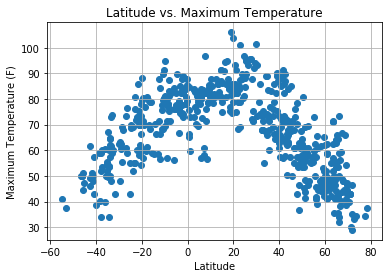

In [10]:
plt.scatter(weatherdataframe["Lat"],weatherdataframe["Max Temp"])
plt.title("Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.grid(True)
plt.savefig("figure1.png")
plt.show()

## Latitude vs. Humidity Plot

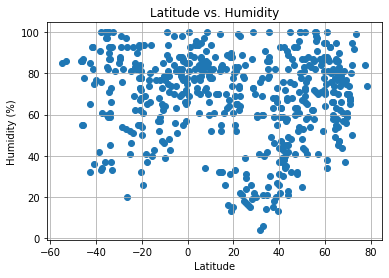

In [11]:
plt.scatter(weatherdataframe["Lat"],weatherdataframe["Humidity"])
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("figure2.png")
plt.show()

## Latitude vs. Cloudiness Plot

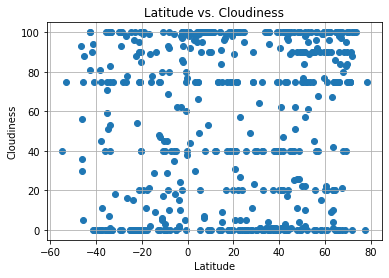

In [12]:
plt.scatter(weatherdataframe["Lat"],weatherdataframe["Cloudiness"])
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("figure3.png")
plt.show()

## Latitude vs. Wind Speed Plot

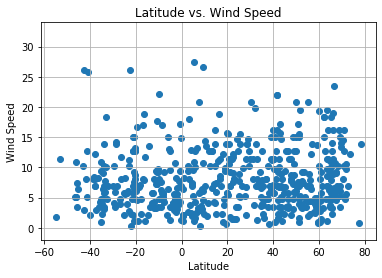

In [13]:
plt.scatter(weatherdataframe["Lat"],weatherdataframe["Wind Speed"])
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(-2, 34)
plt.grid(True)
plt.savefig("figure4.png")
plt.show()

## Data Analysis

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [23]:
# Create Northern and Southern Hemisphere DataFrames

northernhemi = weatherdataframe.loc[(weatherdataframe["Lat"] >= 0)]
southernhemi = weatherdataframe.loc[(weatherdataframe["Lat"] <= 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [55]:
northernmaxtemp = northernhemi["Max Temp"]
northernlatitude = northernhemi["Lat"]

In [56]:
slope, intercept, r_value, p_value, std_err = linregress(northernlatitude, northernmaxtemp)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

slope: -0.604065    intercept: 91.114783
R-squared: 0.573908


No handles with labels found to put in legend.


R-squared: 0.000747


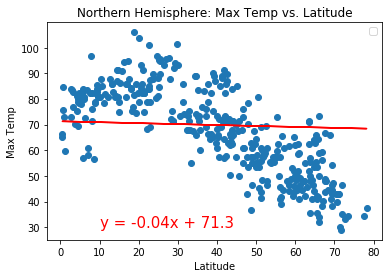

<Figure size 432x288 with 0 Axes>

In [79]:
plt.plot(northernlatitude, northernmaxtemp, 'o')
plt.plot(northernlatitude, intercept + slope*northernlatitude, 'r')
plt.title("Northern Hemisphere: Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()

plt.savefig("figur4.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [58]:
southernmaxtemp = southernhemi["Max Temp"]
southernlatitude = southernhemi["Lat"]

In [59]:
slope, intercept, r_value, p_value, std_err = linregress(southernlatitude, southernmaxtemp)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

slope: 0.781969    intercept: 83.484516
R-squared: 0.620080


No handles with labels found to put in legend.


R-squared: 0.000747


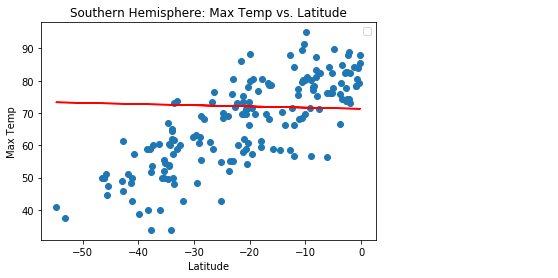

<Figure size 432x288 with 0 Axes>

In [80]:
plt.plot(southernlatitude, southernmaxtemp, 'o')
plt.plot(southernlatitude, intercept + slope*southernlatitude, 'r')
plt.title("Southern Hemisphere: Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()

plt.savefig("figure5.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [66]:
northernhumid = northernhemi["Humidity"]
northernlatitude = northernhemi["Lat"]

In [71]:
slope, intercept, r_value, p_value, std_err = linregress(northernlatitude, northernhumid)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

slope: 0.013059    intercept: 65.642689
R-squared: 0.000146


No handles with labels found to put in legend.


R-squared: 0.000747


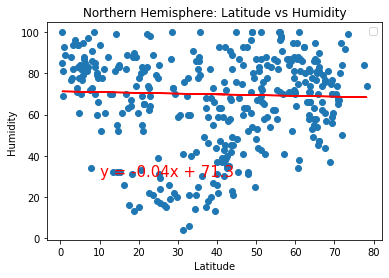

<Figure size 432x288 with 0 Axes>

In [81]:
plt.plot(northernlatitude, northernhumid, 'o')
plt.plot(northernlatitude, intercept + slope*northernlatitude, 'r')
plt.title("Northern Hemisphere: Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()

plt.savefig("figur6.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [82]:
southernhumid = southernhemi["Humidity"]
southernlatitude = southernhemi["Lat"]

In [77]:
slope, intercept, r_value, p_value, std_err = linregress(southernlatitude, southernhumid)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

slope: -0.036557    intercept: 71.302810
R-squared: 0.000747


No handles with labels found to put in legend.


R-squared: 0.000747


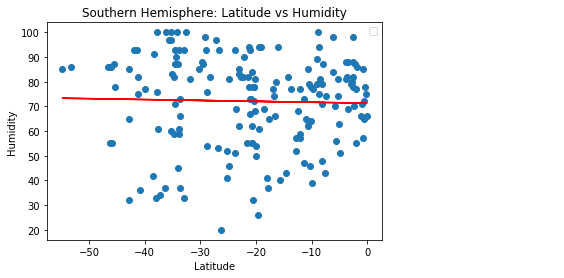

<Figure size 432x288 with 0 Axes>

In [83]:
plt.plot(southernlatitude, southernhumid, 'o')
plt.plot(southernlatitude, intercept + slope*southernlatitude, 'r')
plt.title("Southern Hemisphere: Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()

plt.savefig("figure7.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [85]:
northernlatitude = northernhemi["Lat"]
northerncloudiness = northernhemi["Cloudiness"]

slope, intercept, r_value, p_value, std_err = linregress(northernlatitude, northerncloudiness)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

slope: -0.017854    intercept: 56.845664
R-squared: 0.000085


No handles with labels found to put in legend.


R-squared: 0.000085


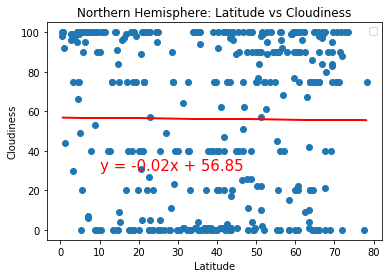

<Figure size 432x288 with 0 Axes>

In [86]:
plt.plot(northernlatitude, northerncloudiness, 'o')
plt.plot(northernlatitude, intercept + slope*northernlatitude, 'r')
plt.title("Northern Hemisphere: Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()

plt.savefig("figure8.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [87]:
southernlatitude = southernhemi["Lat"]
southerncloudiness = southernhemi["Cloudiness"]

slope, intercept, r_value, p_value, std_err = linregress(southernlatitude, southerncloudiness)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

slope: -0.042134    intercept: 46.750210
R-squared: 0.000210


No handles with labels found to put in legend.


R-squared: 0.000210


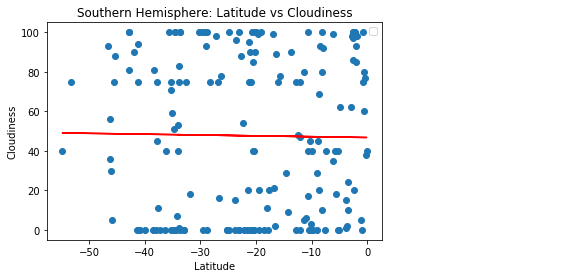

<Figure size 432x288 with 0 Axes>

In [88]:
plt.plot(southernlatitude, southerncloudiness, 'o')
plt.plot(southernlatitude, intercept + slope*southernlatitude, 'r')
plt.title("Southern Hemisphere: Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()

plt.savefig("figure9.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [90]:
northernlatitude = northernhemi["Lat"]
northernwindspeed = northernhemi["Wind Speed"]

slope, intercept, r_value, p_value, std_err = linregress(northernlatitude, northernwindspeed)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

slope: 0.014070    intercept: 7.629844
R-squared: 0.003388


No handles with labels found to put in legend.


R-squared: 0.009226


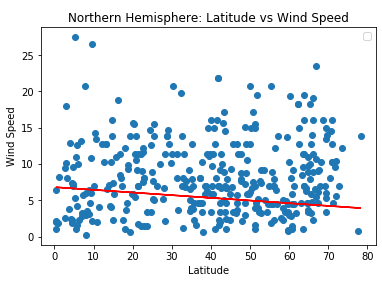

<Figure size 432x288 with 0 Axes>

In [93]:
plt.plot(northernlatitude, northernwindspeed, 'o')
plt.plot(northernlatitude, intercept + slope*northernlatitude, 'r')
plt.title("Northern Hemisphere: Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()

plt.savefig("figure10.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [92]:
southernlatitude = southernhemi["Lat"]
southernwindspeed = southernhemi["Wind Speed"]

slope, intercept, r_value, p_value, std_err = linregress(southernlatitude, southernwindspeed)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

slope: -0.036860    intercept: 6.829346
R-squared: 0.009226


No handles with labels found to put in legend.


R-squared: 0.009226


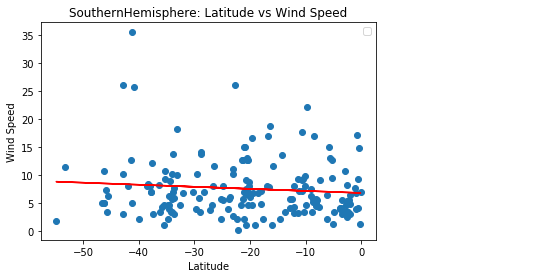

<Figure size 432x288 with 0 Axes>

In [94]:
plt.plot(southernlatitude, southernwindspeed, 'o')
plt.plot(southernlatitude, intercept + slope*southernlatitude, 'r')
plt.title("SouthernHemisphere: Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()

plt.savefig("figure11.png")